In [3]:
def merge(A, p, q, r):
    '''
    Takes two divisions in a list (index p to q and index q+1 to r) and iteratively compares the number from the two lists amongst which the smaller
    number is encoded back into the main array. 

    Parameters:
    A (array): The master array from which a subarray is going to be merged
    p (int): The starting point of the subarray in terms of an index of A
    q (int): The point of division in the subarray in terms of an index of A
    r (int): The ending point of the subarray in terms of an index of A

    Returns:
    A (array): A sub-sorted array where the order of the numbers in the divided arrays are maintained and sorted within that constraint.

    '''
    global counter
    counter +=1
    Left = A[p:q+1] #Creates the left division of the array from index p to q
    Right = A[q+1:r+1] #Creates the right division in a similar manner
    
    Left.append(float('inf')) #This adds the sentinels that act as a placeholder for the end of one list 
    Right.append(float('inf'))
    
    i = j = 0 #Initializing the iterators i and j
   
    for current_index in range(p,r+1): #Iterating through the subarray within A that will be reordered
        if Left[i] <= Right[j]: #If condition which compares Left's and Right's current values from the left and inputs the smaller one
            A[current_index] = Left[i]
            i += 1 #i iterated to get to the next value in Left to compare with
        else: #Vice versa when Right's smaller
            A[current_index] = Right[j]
            j += 1
  
    return A

def merge_sort(A,p,r):
    '''
    Takes a master array and a subarray within defined by endpoints p and r. Then by recursively sorting over smaller and smaller chunks of the subarray, reconstructs a sorted subarray. 

    Parameters:
    A (array): The master array from which a subarray is going to be sorted
    p (int): The starting point of the subarray in terms of an index of A
    r (int): The ending point of the subarray in terms of an index of A

    Returns:
    A (array): An array with the subarray (A[p:r+1]) being sorted.
    '''
    global counter
    if p < r: #If statement that confirms whether the current list being sorted is not the base case (with a length of 1)
        q = ((p+r)//2) #Using floor division to set the midpoint between the endpoints of the subarray
        merge_sort(A,p,q)#Recursively calling on to merge_sort to sort the first half of the subarray
        merge_sort(A,q+1,r) #Recursively calling on to merge_sort to sort the second half of the subarray
        merge(A,p,q,r) #calls upon the merge function defined above to fuse the divided (assumingly) sorted halves back together
        counter += 1
        return A
    else: #In the base case, changes nothing
        return A

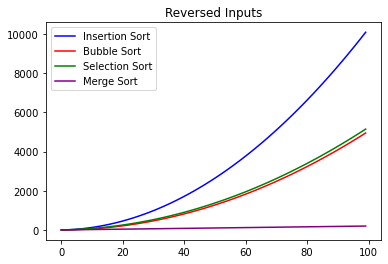

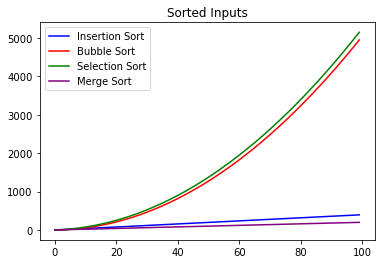

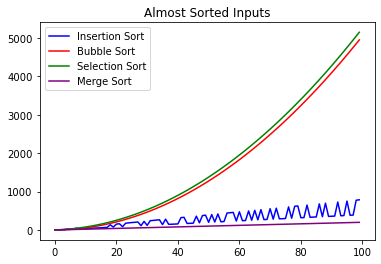

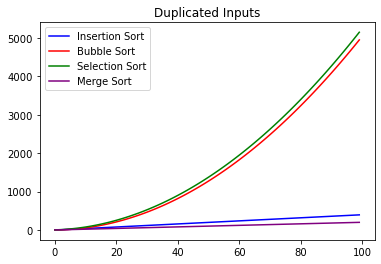

In [7]:
def selection_sort(A):
    n = len(A)
    steps = 1
    for i in range(0, n): #iterating through the values up to but not including the final item in the list
        minidx = i #creating a dummy variable for index
        steps +=2
        for j in range(i+1, n):
            steps +=1
            if A[j] < A[minidx]:
                minidx = j
                steps += 1
        A[i], A[minidx] = A[minidx], A[i]
        steps +=1

    return steps

def bubble_sort(A):
    steps = 0
    for i in range(0,len(A)-1): #creating a range to iterate through from 0 to len(A) - 1 to simulate everything but the last number
        steps += 1
        for j in range(len(A)-1,i, -1): #creating a descending range from the other end for everything but the first
            steps +=1
            if A[j] < A[j-1]:
                A[j], A[j-1] = A[j], A[j-1]
                steps +=1
            
    return steps

def insertion_sort(A):
    
    steps = 0
  
    for j in range(1, len(A)): #creating a range to iterate through
        key = A[j] #the current item to be sorted
        i = j-1
        steps += 3
        while i >= 0 and A[i] > key: #this sequence goes through the previously sorted to see where the new number fits
            A[i+1] = A[i]
            i -= 1
            steps +=2
        A[i+1] = key
        steps+=1
    return steps


import random

import matplotlib.pyplot as plt

import numpy as np

def reversor(a):
    return list(range(a,0,-1))

def done(a):
    return list(range(1,a+1))

def almost_sorted(a):
    
    initial = list((range(1, a+1)))
    
    looper = random.randrange(a+1)
    
    for b in range(looper):
        
        k = random.random()
        if k > 0.5:
            initial[0], initial[a-1] = initial[a-1], initial[0]
        else:
            if a > 6:
                initial[a//2], initial[(a//2)+1] = initial[(a//2)+1], initial[a//2]
            
    return initial

def duplicator(a):
    
    initial = list(range(1, a+1))
    
    for b in range(a):
        if b != a-1:
            k = random.random()
            if k > 0.5:
                initial[b+1] = initial[b]
    
    return initial

list_of_inputs = [[] for a in range(4)]

for a in range(100):
    list_of_inputs[0].append(reversor(a))
    list_of_inputs[1].append(done(a))
    list_of_inputs[2].append(almost_sorted(a))
    list_of_inputs[3].append(duplicator(a))
    
insertion_sort_times = [[] for a in range(4)]

for a in range(len(list_of_inputs)):
    for b in list_of_inputs[a]:
        insertion_sort_times[a].append(insertion_sort(b))
        
bubble_sort_times = [[] for a in range(4)]

for a in range(len(list_of_inputs)):
    for b in list_of_inputs[a]:
        bubble_sort_times[a].append(bubble_sort(b))
        
selection_sort_times = [[] for a in range(4)]

for a in range(len(list_of_inputs)):
    for b in list_of_inputs[a]:
        selection_sort_times[a].append(selection_sort(b))
        
merge_sort_times = [[] for a in range(4)]

for a in range(len(list_of_inputs)):
    global counter
    for b in list_of_inputs[a]:
        counter = 1
        merge_sort(b, 0, len(b)-1)
    
        merge_sort_times[a].append(counter)
        
x_values = [a for a in range(100)]

a = plt.plot(x_values,insertion_sort_times[0], color = 'blue')
b = plt.plot(x_values,bubble_sort_times[0], color = 'red')
c = plt.plot(x_values,selection_sort_times[0], color = 'green')
d = plt.plot(x_values,merge_sort_times[0], color = 'purple')
plt.legend(['Insertion Sort', 'Bubble Sort', 'Selection Sort', 'Merge Sort'])
plt.title('Reversed Inputs')
plt.show()

a = plt.plot(x_values,insertion_sort_times[1], color = 'blue')
b = plt.plot(x_values,bubble_sort_times[1], color = 'red')
c = plt.plot(x_values,selection_sort_times[1], color = 'green')
plt.title('Sorted Inputs')
d = plt.plot(x_values,merge_sort_times[0], color = 'purple')
plt.legend(['Insertion Sort', 'Bubble Sort', 'Selection Sort', 'Merge Sort'])
plt.show()

a = plt.plot(x_values,insertion_sort_times[2], color = 'blue')
b = plt.plot(x_values,bubble_sort_times[2], color = 'red')
c = plt.plot(x_values,selection_sort_times[2], color = 'green')
plt.title('Almost Sorted Inputs')
d = plt.plot(x_values,merge_sort_times[0], color = 'purple')
plt.legend(['Insertion Sort', 'Bubble Sort', 'Selection Sort', 'Merge Sort'])
plt.show()

a = plt.plot(x_values,insertion_sort_times[3], color = 'blue')
b = plt.plot(x_values,bubble_sort_times[3], color = 'red')
c = plt.plot(x_values,selection_sort_times[3], color = 'green')
plt.title('Duplicated Inputs')
d = plt.plot(x_values,merge_sort_times[0], color = 'purple')
plt.legend(['Insertion Sort', 'Bubble Sort', 'Selection Sort', 'Merge Sort'])
plt.show()

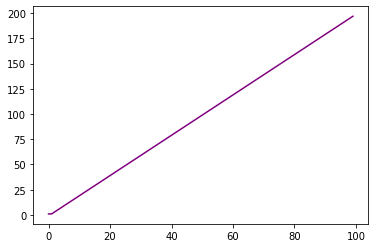

In [8]:
d = plt.plot(x_values,merge_sort_times[0], color = 'purple')